In [1]:
import pandas as pd

data_path = ""

adv = pd.read_csv(data_path+"Advertising.csv", index_col=0)
adv.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
import numpy as np
Y = adv['sales']        #responsvektor
X = np.column_stack([np.ones(Y.shape[0]), adv['TV'], adv['radio'], adv['newspaper']])    #designmatris
X

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

\begin{equation*}

\hat{\beta}= (X^TX)^{-1}X^TY

\end{equation*}


In [3]:
b = np.linalg.pinv(X.T @ X)@ X.T @ Y
k = len(b)-1   #dimension, alltså antal x, alltså 3
n = Y.shape[0]
SSE = np.sum(np.square(Y - (X @ b)))

var = SSE/(n-k-1)
S = np.sqrt(var)


Syy = (n*np.sum(np.square(Y)) - np.square(np.sum(Y)))/n

SSR = Syy - SSE
SSR_2=np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n)  #alternativt sätt att räkna ut
# SSE = Syy - SSR

SSR, SSR_2

(4860.323487097813, 4860.323487097841)

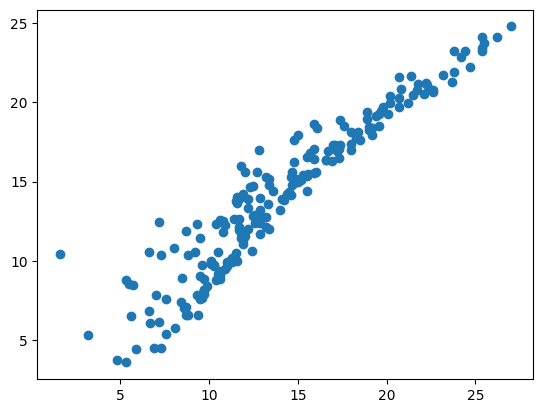

In [4]:
import matplotlib.pyplot as plt

plt.scatter(Y, X @ b)


In [15]:
b


array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [16]:
Rsq = SSR/Syy
Rsq

# Apparently we can choose 90% as confidence level (konfidensgrad)

0.8972106381789521

In [6]:
# signifikanstest:
import scipy.stats as stats

# H0: all β = 0
sig_statistic = (SSR/k)/S
p_significance = stats.f.sf(sig_statistic, k, n-k-1)    # se labbinstruktion
p_significance, sig_statistic

# we reject the null-hypothesis, regression IS significant!


(6.373276981801425e-117, 961.1971866719289)

In [25]:
# Variance/Co-variance matrix

c = np.linalg.pinv(X.T @ X)*var

# H0: b3 is irrelevant

b3_statistic = b[3] / (S*np.sqrt(c[3,3]))           # testa att ändra 3,3 till 2,2 eller 1,1 för att kolla TV eller Radio

p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))
            # kolla labbhandledning
p_b3    # högt värde, b3 är troligen irrelevant

0.9166073083091348

In [ ]:
Y = adv['sales']        #responsvektor
X = np.column_stack([np.ones(Y.shape[0]), adv['TV'], adv['radio'], adv['newspaper']])    #designmatris
X

# gör om allt från början, utan newspaper!